In [1]:
import pandas as pd
import numpy as np

In [2]:
data = pd.read_csv("C:/deliverytime..csv")

In [3]:
data.head()

,DeliveryTime,SortingTime
0,21.00,10
1,13.50,4
2,19.75,6
3,24.00,9
4,29.00,10


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21 entries, 0 to 20
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   DeliveryTime  21 non-null     float64
 1   SortingTime   21 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 464.0 bytes


In [5]:
data.describe()

,DeliveryTime,SortingTime
count,21.000000,21.000000
mean,16.790952,6.190476
std,5.074901,2.542028
min,8.000000,2.000000
25%,13.500000,4.000000
50%,17.830000,6.000000
75%,19.750000,8.000000
max,29.000000,10.000000


In [6]:
data.corr()

,DeliveryTime,SortingTime
DeliveryTime,1.000000,0.825997
SortingTime,0.825997,1.000000


C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='SortingTime', ylabel='Density'>

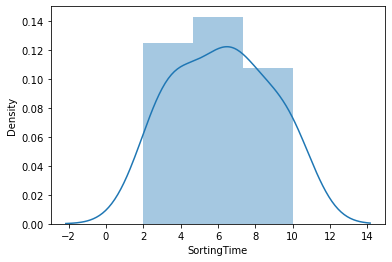

In [7]:
import seaborn as sns
sns.distplot(data['SortingTime'])

C:\Users\hp\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='DeliveryTime', ylabel='Density'>

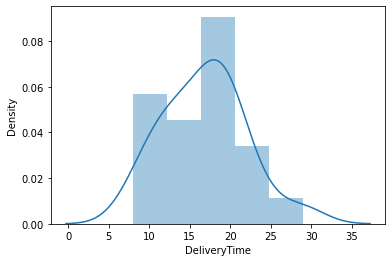

In [8]:
sns.distplot(data['DeliveryTime'])

<AxesSubplot:>

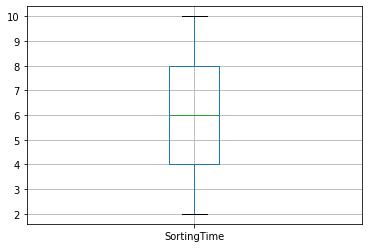

In [9]:
data.boxplot(['SortingTime'])

<AxesSubplot:>

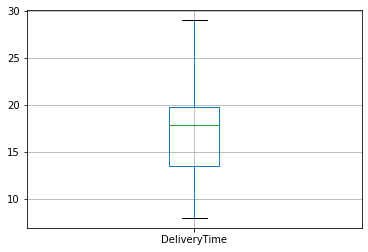

In [10]:
data.boxplot(['DeliveryTime'])

In [11]:
import statsmodels.formula.api as smf
model=smf.ols("DeliveryTime~SortingTime",data=data).fit()

<AxesSubplot:xlabel='SortingTime', ylabel='DeliveryTime'>

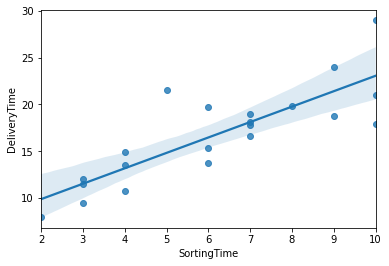

In [12]:
sns.regplot(x="SortingTime",y="DeliveryTime",data=data)

In [13]:
model.params

Intercept      6.582734
SortingTime    1.649020
dtype: float64

In [14]:
print(model.tvalues, '\n', model.pvalues)

Intercept      3.823349
SortingTime    6.387447
dtype: float64 
 Intercept      0.001147
SortingTime    0.000004
dtype: float64


In [15]:
model.rsquared,model.rsquared_adj

(0.6822714748417231, 0.6655489208860244)

In [16]:
newdata=pd.Series([1,11,5,13,15])
newdata

0     1
1    11
2     5
3    13
4    15
dtype: int64

In [17]:
data_pred=pd.DataFrame(newdata,columns=['SortingTime'])

In [18]:
model.predict(data_pred)

0     8.231754
1    24.721953
2    14.827833
3    28.019993
4    31.318032
dtype: float64

In [19]:
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           DeliveryTime   R-squared:                       0.682
Model:                            OLS   Adj. R-squared:                  0.666
Method:                 Least Squares   F-statistic:                     40.80
Date:                Wed, 09 Jun 2021   Prob (F-statistic):           3.98e-06
Time:                        18:03:45   Log-Likelihood:                -51.357
No. Observations:                  21   AIC:                             106.7
Df Residuals:                      19   BIC:                             108.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
===============================================================================
                  coef    std err          t      P>|t|      [0.025      0.975]
-------------------------------------------------------------------------------
Intercept       6.5827      1.722      3.823      0.001       2.979      10.186
SortingTime     1.6490      0.258      6.387      0.000       1.109       2.189
==============================================================================
Omnibus:                        3.649   Durbin-Watson:                   1.248
Prob(Omnibus):                  0.161   Jarque-Bera (JB):                2.086
Skew:                           0.750   Prob(JB):                        0.352
Kurtosis:                       3.367   Cond. No.                         18.3
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""